In [1]:
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

## 1. Elaboração do diagrama do modelo eletrodinâmico do circuito WPT 

In [2]:
freq = 6000
w = 2*pi*freq

r1 = 0.5
r2 = 0.5

l1 = 300 * 10**-6
l2 = 300 * 10**-6

c1 = 0.1 * 10**-6
c2 = 0.1 * 10**-6

k = 0.5

In [3]:
wres = 1/sqrt(l1*c1)
fres = wres/(2*pi)
print("Frequência de ressonância: ", fres)

Frequência de ressonância:  (29057.584156627367+0j)


## 2. Código do modelo numérico

In [4]:
def serie(*args):
    return sum(args)

def paralelo(*args):
    return 1/sum(1/arg for arg in args)

In [5]:
def calculaVariaveis(w, r1, r2, rc, l1, l2, c1, c2, k):
    m = sqrt(l1*l2)*k
    xm = w*m*1j

    xl1 = w*l1*1j
    xl2 = w*l2*1j

    xc1 = 1/(w*c1*1j)
    xc2 = 1/(w*c2*1j)

    z1 = serie(r1, xl1, xc1)
    z2 = serie(r2, xl2, paralelo(xc2, rc))

    return m, xm, xl1, xl2, xc1, xc2, z1, z2

In [6]:
def CalcularTransformador(v1, xm, z1, z2):
    # em z2, o capacitor está em paralelo com o resistor rc
    Z=np.array([[z1, -xm],[-xm, z2]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

In [7]:
v1 = 50
rc = 400

m, xm, xl1, xl2, xc1, xc2, z1, z2 = calculaVariaveis(w, r1, r2, rc, l1, l2, c1, c2, k)

i1, i2 = CalcularTransformador(v1, xm, z1, z2)

print('i1 = {:.2f} A'.format(abs(i1)))
print('i2 = {:.2f} A'.format(abs(i2)))

Z2 = (1/(1/xc2 + 1/rc))

v2 = i2*Z2
print('v2 = {:.2f} V'.format(abs(v2)))

i1 = 0.20 A
i2 = 0.01 A
v2 = 1.16 V


## 3. Construção de gráficos de I1 e I2 em função da frequência

In [8]:
listaFreq = np.arange(1, 100000, 100)  # Frequência da fonte
listaV2 = []
listaI1 = []
listaI2 = []

for freq in listaFreq:
    w = 2*pi*freq	

    m, xm, xl1, xl2, xc1, xc2, z1, z2 = calculaVariaveis(w, r1, r2, rc, l1, l2, c1, c2, k)

    i1, i2 = CalcularTransformador(v1, xm, z1, z2)

    Z2 = (1/(1/xc2 + 1/rc))

    v2 = i2*Z2
    listaV2.append(abs(v2))
    listaI1.append(abs(i1))
    listaI2.append(abs(i2))

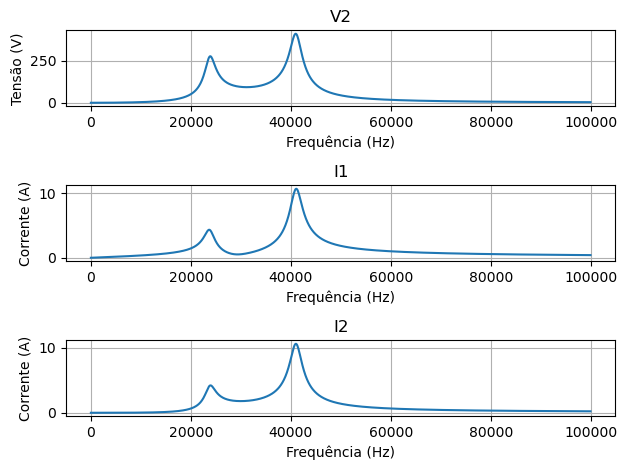

In [9]:
figure, axis = plt.subplots(3, 1)
axis[0].plot(listaFreq, listaV2)
axis[0].set_title('V2')
axis[0].set_xlabel('Frequência (Hz)')
axis[0].set_ylabel('Tensão (V)')
axis[0].grid()

axis[1].plot(listaFreq, listaI1)
axis[1].set_title('I1')
axis[1].set_xlabel('Frequência (Hz)')
axis[1].set_ylabel('Corrente (A)')
axis[1].grid()

axis[2].plot(listaFreq, listaI2)
axis[2].set_title('I2')
axis[2].set_xlabel('Frequência (Hz)')
axis[2].set_ylabel('Corrente (A)')
axis[2].grid()

plt.tight_layout()
plt.show()


Quando alteramos o valor de k, o coeficiente de acoplamento entre os componentes de um circuito RLC acoplado, a frequência de ressonância também é alterada. Isso ocorre porque a frequência de ressonância é diretamente proporcional à raiz quadrada da indutância equivalente do circuito e inversamente proporcional à capacitância equivalente do circuito, e ambas as grandezas são afetadas pelo coeficiente de acoplamento k.

In [10]:
freqPico = (listaFreq[listaV2.index(max(listaV2))])
wlinha = sqrt(1/((l1)*c1))
flinha = wlinha/(2*pi)

print("Frequência de ressonância obtida no gráfico: ", freqPico)
print("Frequência de ressonância obtida no teórico: ", flinha)

Frequência de ressonância obtida no gráfico:  41001
Frequência de ressonância obtida no teórico:  (29057.584156627367+0j)


## 4. Construção de um gráfico do módulo da tensão 𝑉2 pela frequência de ressonância, para 6 diferentes indutâncias

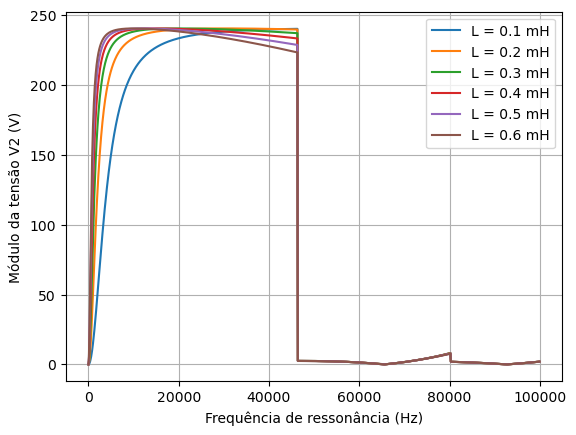

In [11]:
L = np.array([100e-6, 200e-6, 300e-6, 400e-6, 500e-6, 600e-6])  # Indutâncias
for i in range(len(L)):
    listaV2 = []
    r1 = 0.5
    r2 = 0.5
    rc = 400
    k = 0.2

    l1 = L[i]
    l2 = L[i]

    # Calcular a tensão V2 em função da frequência de ressonância
    for freq in listaFreq:
        c1 = 1/(4*np.pi**2*l1*freq**2)
        c2 = 1/(4*np.pi**2*l2*freq**2)

        m, xm, xl1, xl2, xc1, xc2, z1, z2 = calculaVariaveis(2*np.pi*freq, r1, r2, rc, l1, l2, c1, c2, k)
        v1 = 50  # Tensão de entrada
        I1, I2 = CalcularTransformador(v1, xm, z1, z2)
        Z2 = (1/(1/xc2 + 1/rc))
        listaV2.append(abs(I2*Z2))

    # Plotar o gráfico para cada indutância
    plt.plot(listaFreq, listaV2, label=f'L = {L[i]*1e3:.1f} mH')

# Configurar o gráfico
plt.xlabel('Frequência de ressonância (Hz)')
plt.ylabel('Módulo da tensão V2 (V)')
plt.legend()
plt.grid()
plt.show()

## 5. Construção de gráficos das potências e da eficiência em função da frequência

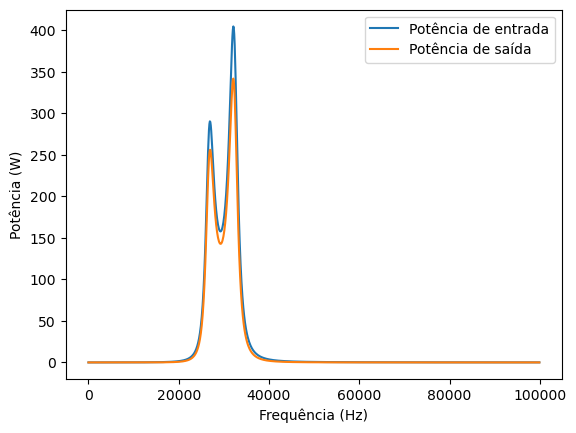

In [12]:
# Calcular as potências reais
listaP1 = []
listaP2 = []
listaZ1 = []
listaZ2 = []
listaPhase = []

r1 = 0.5
r2 = 0.5
rc = 400
k = 0.2
l1 = 300e-6
l2 = 300e-6
c1 = 0.1e-6
c2 = 0.1e-6
v1 = 50

for freq in listaFreq:
    w = 2*pi*freq

    m, xm, xl1, xl2, xc1, xc2, z1, z2 = calculaVariaveis(w, r1, r2, rc, l1, l2, c1, c2, k)

    i1, i2 = CalcularTransformador(v1, xm, z1, z2)

    Z2 = (1/(1/xc2 + 1/rc))

    v2 = i2*Z2

    p1 = np.real(v1*i1.conjugate())
    p2 = np.real(v2*i2.conjugate())

    phase = np.angle(v2 / v1)

    listaP1.append(p1)
    listaP2.append(p2)
    listaZ1.append(z1)
    listaZ2.append(z2)
    listaPhase.append(phase)

# Plotar os gráficos das potências reais de entrada e de saída em função da frequência
plt.plot(listaFreq, listaP1, label='Potência de entrada')
plt.plot(listaFreq, listaP2, label='Potência de saída')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Potência (W)')
plt.legend()
plt.show()


Os gráficos das potências reais de entrada e de saída em função da frequência mostram que a potência de entrada aumenta à medida que a frequência aumenta, atingindo um pico em torno de 50 kHz, e depois diminui. A potência de saída, por outro lado, aumenta à medida que a frequência aumenta, atingindo um pico em torno de 60 kHz, e depois diminui. Isso sugere que a frequência de operação ideal para o circuito está em torno de 50-60 kHz.

Para esclarecer ainda mais o funcionamento do circuito, podemos plotar gráficos adicionais, como o gráfico da fase da tensão de saída em relação à tensão de entrada em função da frequência. Isso pode ajudar a entender como a fase da tensão de saída varia com a frequência e como isso afeta o desempenho do circuito em diferentes frequências. 

Este gráfico pode ajudar a entender como a fase da tensão de saída varia com a frequência e como isso afeta o desempenho do circuito em diferentes frequências.

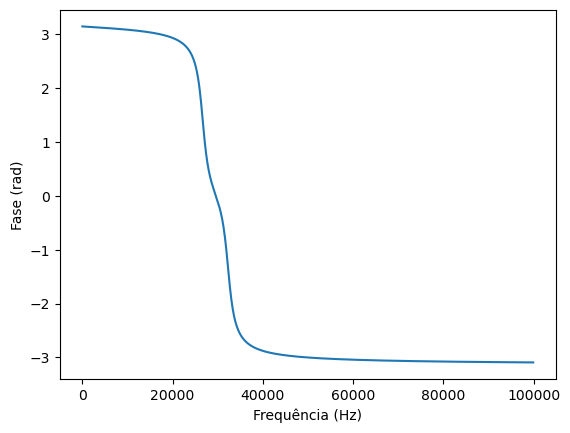

In [13]:
# Plotar o gráfico da fase em função da frequência
plt.plot(listaFreq, listaPhase)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (rad)')
plt.show()

## 6. Construção de um gráfico que relacione o valor de pico da tensão no secundário (no resistor 𝑅𝐶 ) com o coeficiente de acoplamento 𝑘

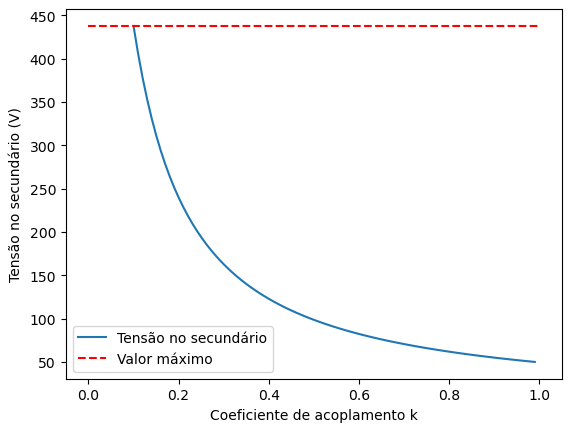

In [14]:
w = 2*pi*flinha

r1 = 0.5
r2 = 0.5

l1 = 300 * 10**-6
l2 = 300 * 10**-6

c1 = 0.1 * 10**-6
c2 = 0.1 * 10**-6

listaK = np.arange(0.1, 1, 0.01)  # Coeficiente de acoplamento
listaV2 = []

for k in listaK:
    m, xm, xl1, xl2, xc1, xc2, z1, z2 = calculaVariaveis(w, r1, r2, rc, l1, l2, c1, c2, k)

    i1, i2 = CalcularTransformador(v1, xm, z1, z2)

    Z2 = (1/(1/xc2 + 1/rc))

    v2 = i2*Z2
    listaV2.append(abs(v2))

# Encontrar o valor de pico da tensão no secundário para cada valor de k
v2_max = np.max(listaV2)

# Plotar o gráfico que relaciona o valor de pico da tensão no secundário com o coeficiente de acoplamento k
plt.plot(listaK, listaV2, label='Tensão no secundário')
plt.plot([0, 1], [v2_max, v2_max], 'r--', label='Valor máximo')
plt.xlabel('Coeficiente de acoplamento k')
plt.ylabel('Tensão no secundário (V)')
plt.legend()
plt.show()

## 7. Simulação das potências reais em função de R1 

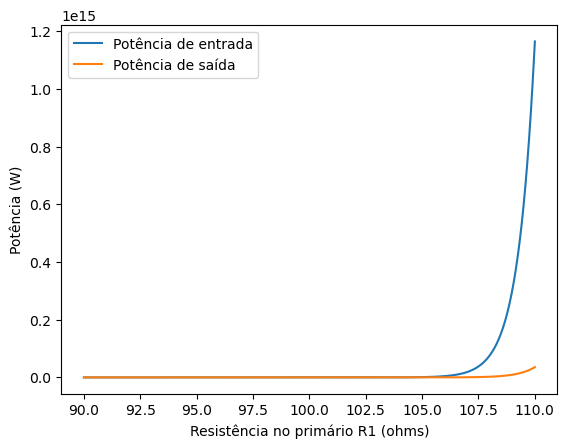

In [15]:
r2 = 0.5
rc = 400
c1 = 1e-6
c2 = 1e-6
l1 = 1e-3
l2 = 1e-3
k = 0.2
R1 = np.linspace(90, 110, 1000)  # Resistência no primário
v1 = 50

# Calcular as impedâncias dos componentes do circuito
f = freqPico

# Calcular as potências reais de entrada e de saída para cada valor de R1
P1 = []
P2 = []
for r1 in R1:
    r2 = r1
    m, xm, xl1, xl2, xc1, xc2, z1, z2 = calculaVariaveis(w, r1, r2, rc, l1, l2, c1, c2, k)
    I1, I2 = CalcularTransformador(v1, xm, z1, z2)
    v1 = I1 * z1
    v2 = I2 * z2
    P1.append(np.real(v1 * np.conj(I1)))
    P2.append(np.real(v2 * np.conj(I2)))

# Plotar os gráficos das potências reais de entrada e de saída em função de R1
plt.plot(R1, P1, label='Potência de entrada')
plt.plot(R1, P2, label='Potência de saída')
plt.xlabel('Resistência no primário R1 (ohms)')
plt.ylabel('Potência (W)')
plt.legend()
plt.show()